<a href="https://colab.research.google.com/github/ChangHuaHua/QM2-Group-12/blob/main/Chloropleth_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Install the geopandas module
!pip install geopandas

#Uninstall any existing version; forcing Yes
!pip uninstall --yes pysal

#Install newest branch
!pip install pysal==2.0.0

#install mapclassify
!pip install mapclassify


     |████████████████████████████████| 25.0MB 53.4MB/s 
  Created wheel for pysal: filename=pysal-2.0.0-cp36-none-any.whl size=25231752 sha256=4b2717c38352bacaf2c223fe15b20a8b96b95d9ec9982874e5b3f56d889a9594
  Stored in directory: /root/.cache/pip/wheels/ca/b9/69/49a64348ddb1feaf76b426c81c1db7275cfabacd8bf4ccd778
Successfully built pysal


In [ ]:
#!pip install descartes



In [6]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pylab
import descartes
import mapclassify 

%matplotlib inline

plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (20., 16.)

# Interactive Map 

In [7]:
# Import statements
import geopandas as gp
import json
import altair as alt
import pandas as pd

In [8]:
#Download World_shapefile https://hub.arcgis.com/datasets/252471276c9941729543be8789e06e12_0 
from google.colab import files
uploaded = files.upload()


Saving World_Countries__Generalized_.cpg to World_Countries__Generalized_.cpg
Saving World_Countries__Generalized_.dbf to World_Countries__Generalized_.dbf
Saving World_Countries__Generalized_.prj to World_Countries__Generalized_.prj
Saving World_Countries__Generalized_.shp to World_Countries__Generalized_.shp
Saving World_Countries__Generalized_.shx to World_Countries__Generalized_.shx


In [12]:
# Add all files to one folder
!mkdir data
!mkdir data/shp

mkdir: cannot create directory ‘data’: File exists


In [66]:
datapath = '/content/data/shp/World_Countries__Generalized_.shp'
world= gp.read_file(datapath)
world['COUNTRY'].replace({"Congo DRC": "Democratic Republic of Congo","Côte d'Ivoire": "Cote d'Ivoire"}, inplace=True)

world.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,2,United States Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,3,Cook Islands,CK,New Zealand,NZ,0.980664,0.013073,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
4,5,Niue,NU,New Zealand,NZ,0.541413,0.021414,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."


In [ ]:
#Isolate only for Africa data
#Merge geo data country  with africa data only

In [67]:
#Download TFR_Africa_Cleaned data
from google.colab import files
uploaded = files.upload()

In [68]:
datapath = '/content/1b. TFR_Africa_Cleaned.csv'
df = pd.read_csv(datapath, encoding = 'latin1')
df.rename(columns={'Country Name':'COUNTRY'}, inplace=True)

df = df[['COUNTRY']]


In [69]:
df

,COUNTRY
0,Angola
1,Burundi
2,Benin
3,Burkina Faso
4,Botswana
5,Central African Republic
6,Cote d'Ivoire
7,Cameroon
8,Democratic Republic of Congo
9,Congo


In [70]:
africa = world.merge(df, left_on = 'COUNTRY', right_on = 'COUNTRY')
africa

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,70,Burkina Faso,BF,Burkina Faso,BF,27.007423,22.634154,"POLYGON ((0.91797 10.99640, 0.81195 10.99694, ..."
1,71,Cabo Verde,CV,Cabo Verde,CV,6.512620,0.340358,"MULTIPOLYGON (((-23.52584 14.89611, -23.63334 ..."
2,72,Cote d'Ivoire,CI,Côte d'Ivoire,CI,31.576752,26.340497,"MULTIPOLYGON (((-5.33971 5.19775, -5.31977 5.1..."
3,73,Gambia,GM,Gambia,GM,10.776106,0.895054,"POLYGON ((-16.60974 13.47200, -16.59015 13.461..."
4,74,Ghana,GH,Ghana,GH,23.013664,19.611816,"POLYGON ((-3.16804 6.25631, -3.16722 6.26958, ..."
5,76,Guinea,GN,Guinea,GN,31.720192,20.238618,"POLYGON ((-7.94684 8.01851, -8.01889 8.03028, ..."
6,77,Guinea-Bissau,GW,Guinea-Bissau,GW,17.260424,2.760992,"MULTIPOLYGON (((-15.68167 11.79786, -15.74250 ..."
7,78,Liberia,LR,Liberia,LR,15.171249,7.848847,"POLYGON ((-11.49233 6.92709, -11.46584 6.92361..."
8,79,Mali,ML,Mali,ML,64.204517,106.649581,"POLYGON ((-9.86522 12.05481, -9.91195 12.09333..."
9,80,Mauritania,MR,Mauritania,MR,52.308389,89.905077,"MULTIPOLYGON (((-10.71639 15.43890, -10.71945 ..."


In [71]:
africa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [72]:
africa['geometry'].head()

0    POLYGON ((0.91797 10.99640, 0.81195 10.99694, ...
1    MULTIPOLYGON (((-23.52584 14.89611, -23.63334 ...
2    MULTIPOLYGON (((-5.33971 5.19775, -5.31977 5.1...
3    POLYGON ((-16.60974 13.47200, -16.59015 13.461...
4    POLYGON ((-3.16804 6.25631, -3.16722 6.26958, ...
Name: geometry, dtype: geometry

In [75]:
africa.crs = {'init': u'epsg:4326'}
target_crs = {'datum':'WGS84', 'no_defs':True, 'proj':'merc'}
projected_africa = africa.to_crs(crs=target_crs)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [76]:
projected_africa['geometry'].head()

0    POLYGON ((102188.311 1223553.442, 90385.321 12...
1    MULTIPOLYGON (((-2618884.175 1666252.199, -263...
2    MULTIPOLYGON (((-594413.663 575537.402, -59219...
3    POLYGON ((-1848987.432 1503760.644, -1846806.6...
4    POLYGON ((-352664.242 693184.091, -352573.081 ...
Name: geometry, dtype: geometry

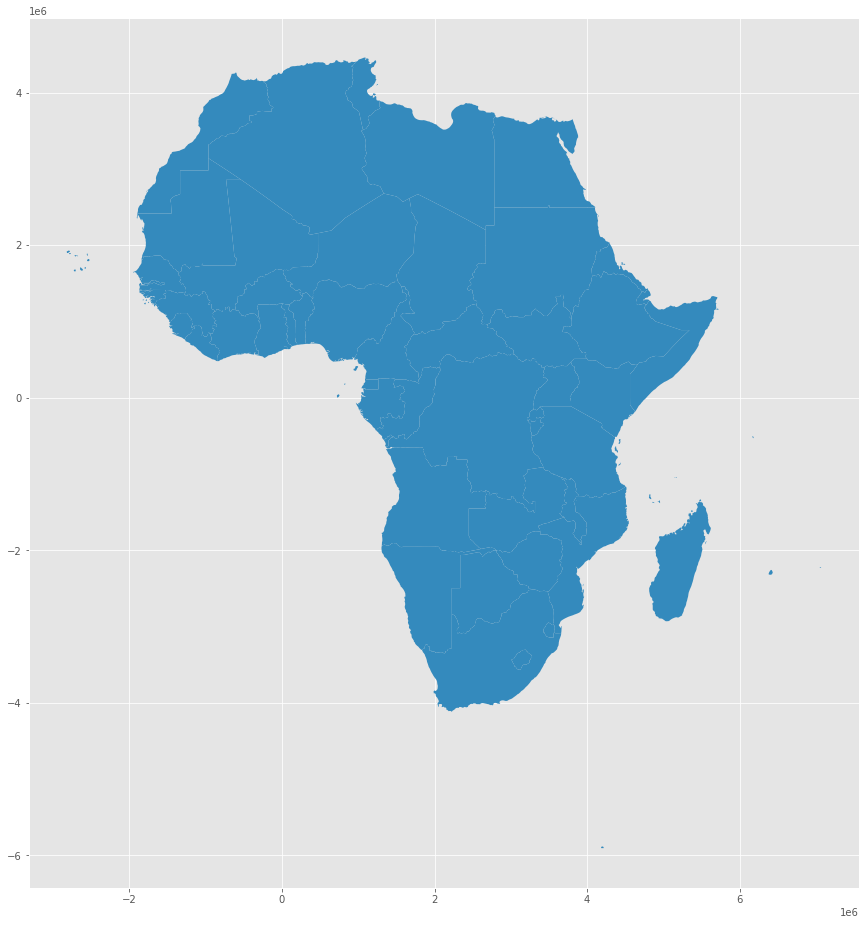

In [77]:
projected_africa.plot()